<a href="https://colab.research.google.com/github/Saerom-Park/Computer-Vision/blob/main/Project/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84/Interpolation(Nearest%20Neighbor%2C%20Bilinear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

중간고사 과제 2

- 주어진 영상에 대하여 아래 순서에 따라 다양한 보간법에 의하여 2배 큰 영상을 구하시오

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving test.jpeg to test.jpeg
User uploaded file "test.jpeg" with length 47100 bytes


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

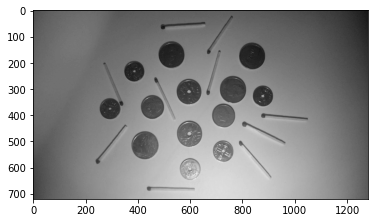

In [ ]:
input_img = cv2.imread('test.jpeg')


gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, 'gray')
plt.show()


이미지 resize(크기조정)

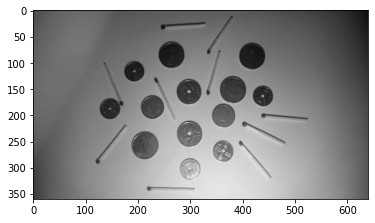

(360, 640)

In [ ]:
scale_percent = 50 # percent of original size
width = int(gray_img.shape[1] * scale_percent / 100)
height = int(gray_img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(gray_img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(img, 'gray')
plt.show()

img.shape


1. Nearest Neighbor Interpolation
- 가장 가까운 값으로 채우는 방법
- Nearest Neighbor Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오
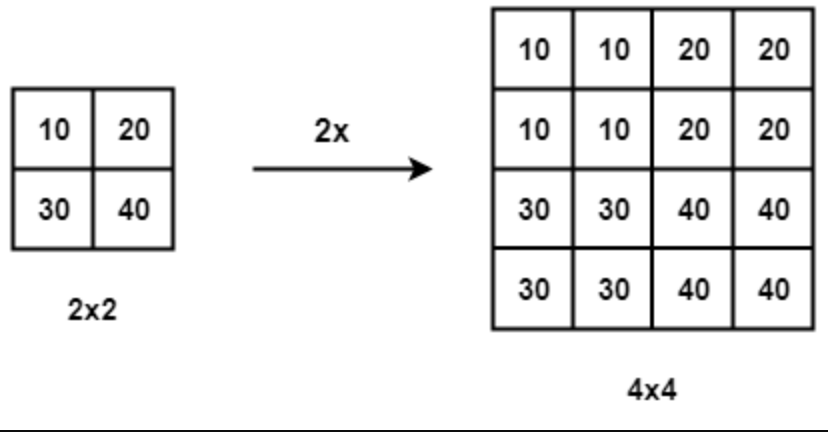

1-1 Neareset Neighbor Interpolation을 이용하여 2배로 영상을 확대하였을 때의 결과를 출력하시오

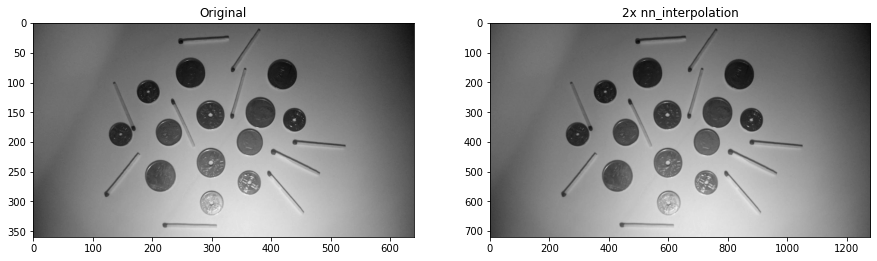

In [ ]:
#Neareest Neighbor Interpotation 함수를 작성하시오
def nn_interpolation(img, ratio): # 이미지와 몇배 확대/축소 할 거인지 입력 받음.

    width, height = img.shape # 영상의 shape

    new_width = width * ratio # 기존 영상의 너비에 ratio를 곱하여 새로운 너비
    new_height = height * ratio # 기존 영상의 높이에 ratio를 곱하여 새로운 높이
    output_img = np.zeros(shape=(np.around(width*ratio).astype(int) ,np.around(height*ratio).astype(int))) # new_width, new_height의 형태를 가진 output_img 생성

    X_coord = np.arange(0.0,width) # 기존 영상의 0부터 width까지 array
    Y_coord = np.arange(0.0, height) # 기존 영상의 0부터 height까지 array

    new_X_coord = np.round(np.linspace(0.0, width, num=new_width, retstep=True)[0],int(ratio/2)) # new 데이터의 X 좌표 생성. 0부터 width까지 new_width의 갯수만큼 sample 생성. 간격 동일하게. 반올림은 int(ratio/2) 자리까지
    new_Y_coord = np.round(np.linspace(0.0, height, num=new_height, retstep=True)[0],int(ratio/2)) # new 데이터의 Y 좌표 생성. 0부터 height까지 new_height의 갯수만큼 sample 생성. 간격 동일하게. 반올림은 int(ratio/2) 자리까지

    for i in range(new_width):
      for j in range(new_height):
        x = new_X_coord[i] # i에 해당하는 x 좌표
        y = new_Y_coord[j] # j에 해당하는 y 좌표

        x = int(X_coord[X_coord <= x][-1]) # 기존 영상의 x 좌표 중에서 new x 좌표보다 작은 값들 사이의 가장 큰 값을 새로운 x
        y = int(Y_coord[Y_coord <= y][-1]) # 기존 영상의 y 좌표 중에서 new y 좌표보다 작은 값들 사이의 가장 큰 값을 새로운 y

        output_img[i,j] = img[x][y] # 기존 영상 img[x][y] 값을 output_img[i,j] 값으로 수정

    return output_img





#2배 확대하였을 때 영상을 가시화 하시오

new_img = nn_interpolation(img,2) # 2배 확대했을 때의 영상
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 2, 1) # original 영상
ax1.imshow(img, 'gray')
ax1.set_title('Original')
#ax1.axis("off")
ax2 = fig.add_subplot(1, 2, 2) # new 영상
ax2.imshow(new_img, 'gray')
ax2.set_title('2x nn_interpolation')
#ax2.axis("off")
plt.show()

1-2 Neareset Neighbor Interpolation을 이용하여 4배로 영상을 확대하였을 때의 결과를 출력하시오

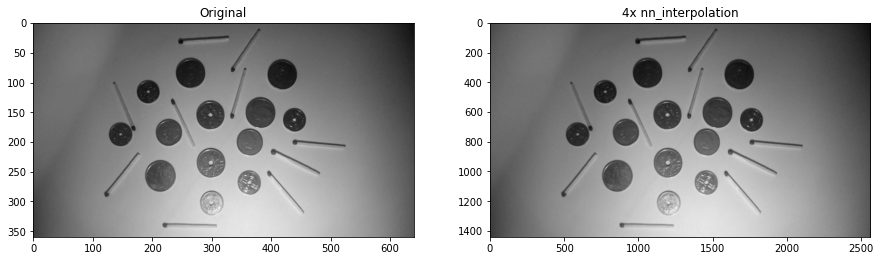

In [ ]:
#4배 확대하였을 때 영상을 가시화 하시오

new_img = nn_interpolation(img,4) # 4배 확대 영상
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 2, 1) # original 영상
ax1.imshow(img, 'gray')
ax1.set_title('Original')
#ax1.axis("off")
ax2 = fig.add_subplot(1, 2, 2) # new 영상
ax2.imshow(new_img, 'gray')
ax2.set_title('4x nn_interpolation')
#ax2.axis("off")
plt.show()

2. Bilinear Interpolation
- 주변 값으로 채우는 방법
- Biinear Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오

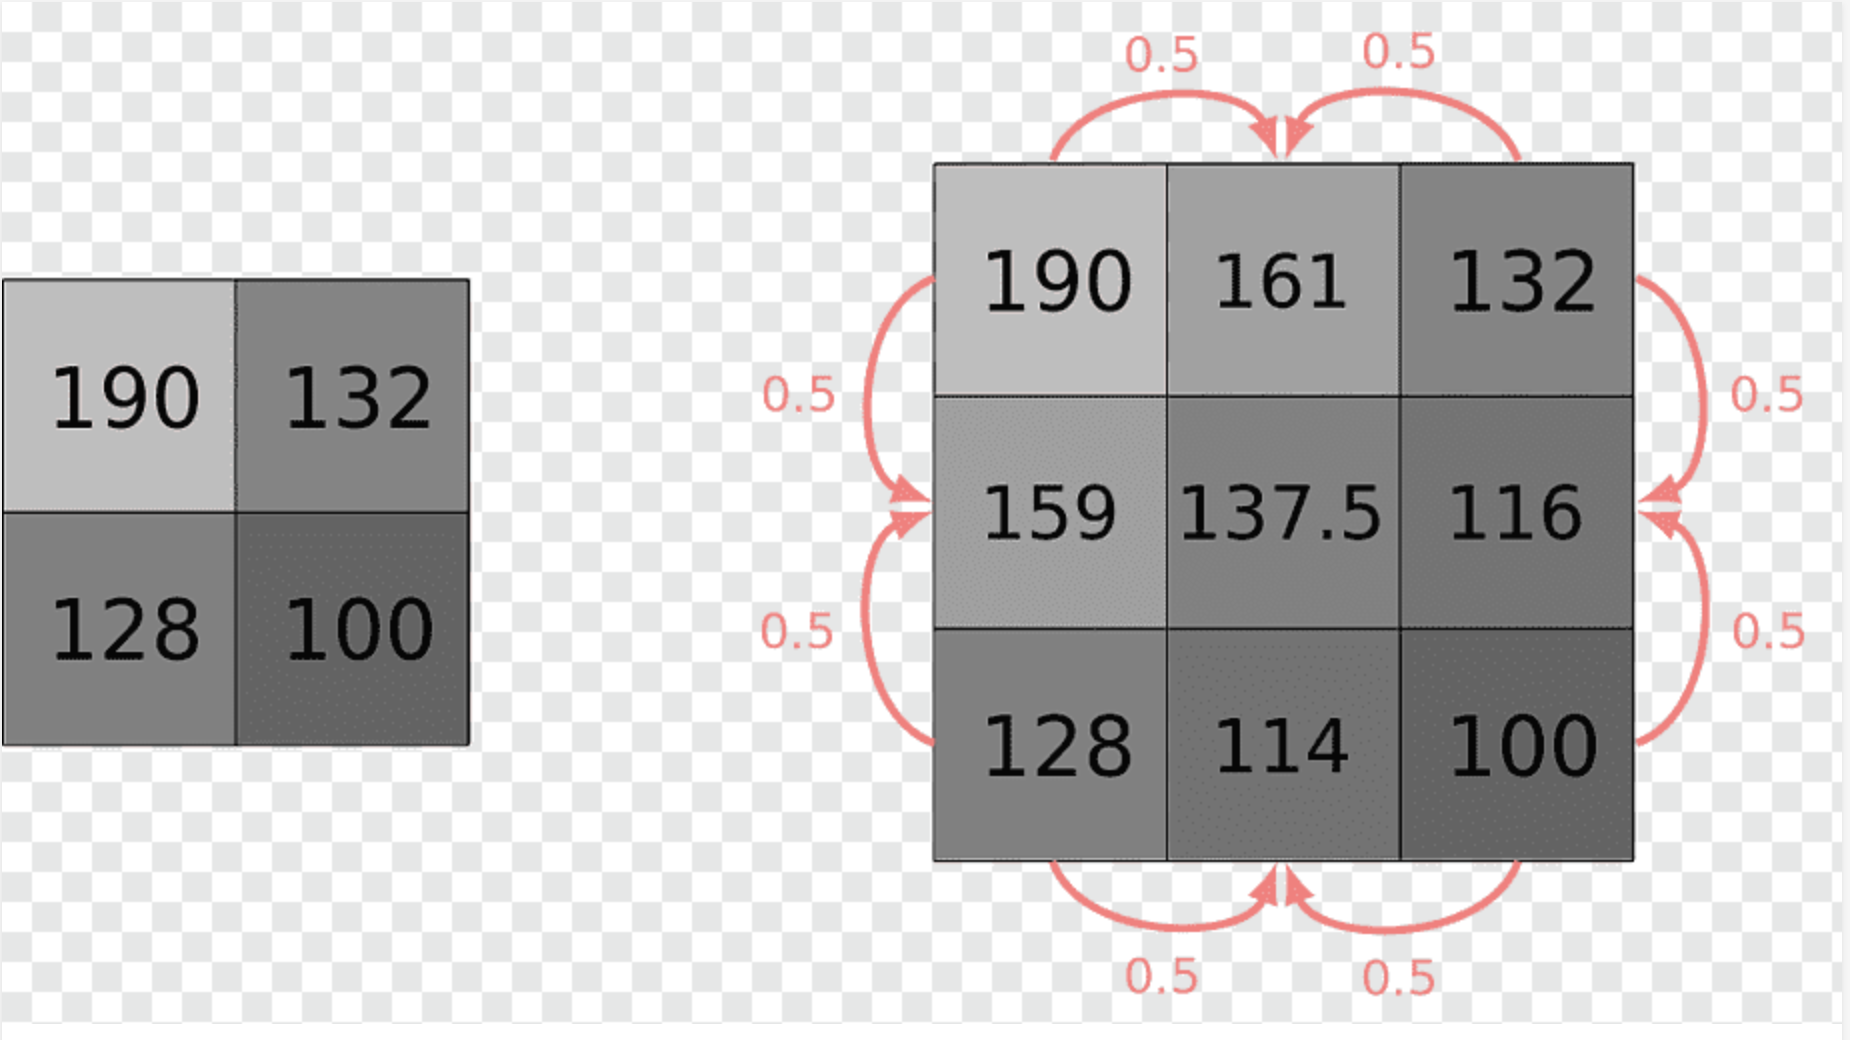

2-1 Bilinear Interpolation을 이용하여 
2배로 영상을 확대하였을 때의 결과를 출력하시오

Bilinear에 대하여 다음 그림과 수식을 이용하여 구하시요
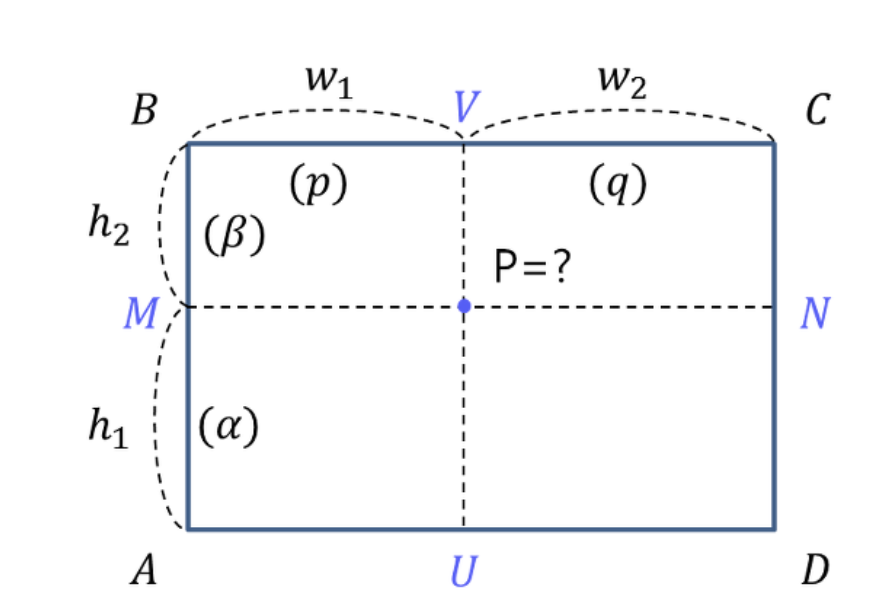

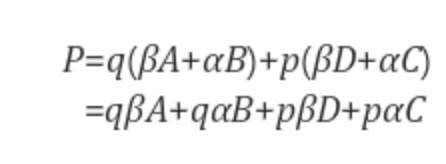

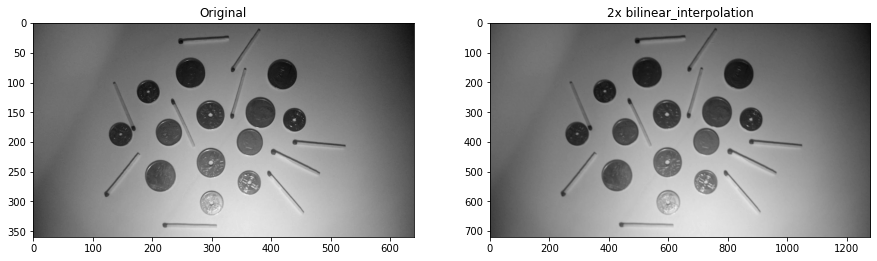

In [ ]:
#Bilnear Interpotation 함수를 작성하시오
def bilinear_interpolation(img, ratio): # 이미지와 몇배 확대/축소 할 거인지 입력 받음.

    width, height = img.shape # 영상의 shape

    new_width = width * ratio # 기존 영상의 너비에 ratio를 곱하여 새로운 너비
    new_height = height * ratio # 기존 영상의 높이에 ratio를 곱하여 새로운 높이
    output_img = np.zeros(shape=(np.around(width*ratio).astype(int) ,np.around(height*ratio).astype(int))) # new_width, new_height의 형태를 가진 output_img 생성

    for i in range(new_width):
      for j in range(new_height):

        px = int(i/ratio) # i를 ratio로 나눈 후 정수화 --> 기존 영상의 x값
        py = int(j/ratio) # j를 ratio로 나눈 후 정수화 --> 기존 영상의 y값

        # weight
        p = i/ratio - px 
        q = 1 - p
        alpha = j/ratio - py
        beta = 1 - alpha

        # row weight와 column weight를 곱함
        w1 = p * alpha
        w2 = p * beta
        w3 = q * alpha
        w4 = q * beta

        # A,B,C,D 4개의 픽셀에 weight를 곱하는 과정 output_img[i,j] 값 수정
        try:    
          A = img[px][py] # 왼쪽 위
          B = img[px][py+1] # 오른쪽 위
          C = img[px+1][py] # 왼쪽 아래
          D = img[px+1][py+1] # 오른쪽 아래

          output_img[i,j] = A*w1 + B*w3 + C*w2 + D*w4 # output_img[i,j] 값 수정
        except: # edge에 위치한 픽셀의 경우 오른쪽과 아래 방향의 값이 없을 수 있음.
          output_img[i,j] = img[px][py] # 기존 영상의 픽셀 값으로 대체

    return output_img



#2배 확대하였을 때 영상을 가시화 하시오

new_img = bilinear_interpolation(img,2) # 2 확대 영상
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 2, 1) # original 영상
ax1.imshow(img, 'gray')
ax1.set_title('Original')
#ax1.axis("off")
ax2 = fig.add_subplot(1, 2, 2) # new 영상
ax2.imshow(new_img, 'gray')
ax2.set_title('2x bilinear_interpolation')
#ax2.axis("off")
plt.show()

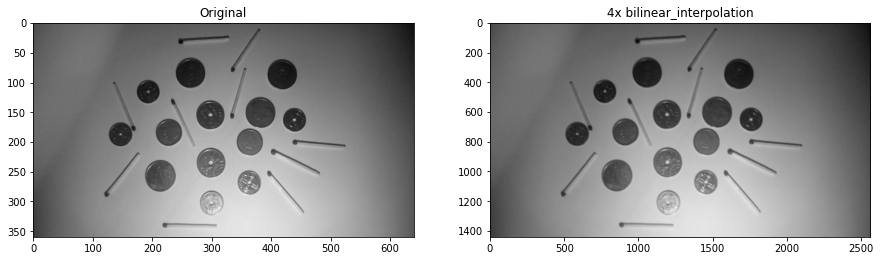

In [ ]:
#4배 확대하였을 때 영상을 가시화 하시오
new_img = bilinear_interpolation(img,4) # 4배 확대 영상
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1, 2, 1) # original 영상
ax1.imshow(img, 'gray')
ax1.set_title('Original')
#ax1.axis("off")
ax2 = fig.add_subplot(1, 2, 2) # new 영상
ax2.imshow(new_img, 'gray')
ax2.set_title('4x bilinear_interpolation')
#ax2.axis("off")
plt.show()